In [2]:
import os, re
import pandas as pd
import plotly.graph_objects as go
import urllib, json

## https://plotly.com/python/sankey-diagram/

In [ ]:
xdata = pd.read_csv('rmdup.animal.clst90_80.AMPclst95.eggnog.txt',sep='\t')
animal_data = xdata[ ['Source','ProID','AMP','AMPlen','Position','Sequence'] ]
animal_data.head()

,Source,ProID,AMP,AMPlen,Position,Sequence
0,ancient_human_gut,AZ107.k141_184032_5,FRRKKW,6,"276,281",MQLVLPFEHMAKAAQYMEPSVFEYVREGEIESFESFEKFDFLAFDW...
1,ancient_human_gut,AZ107.k141_604685_1,VVGVVSRVTNK,11,"15,25",MGLNLLLAGLAVLLVVVGVVSRVTNK
2,ancient_human_gut,AZ107.k141_630992_1,KKLADAVKGFLDKIFNKK,18,"46,63",MKTSLKRIIAFVLVLALSFAAFATVVSAAPVSASAKTESASIGSFF...
3,ancient_human_gut,AZ107.k141_368093_2,KKFGKAAN,8,"221,228",MHLMSNSKHKTGRKPLKLGTVENYHHHWYLLIWLVYLTLFAIAEHV...
4,ancient_human_gut,AZ107.k141_473258_2,YIWKIIK,7,"23,29",MGNKDKNIRLTFYVVCGLLLGAPYIWKIIKLIPELLKTLPNAAEIL...


In [ ]:
marine = pd.read_csv('predictions/MGnify_marine/pred.csv',sep='\t')
marine = marine[marine['ProID']!='ProID']
marine['AMPlen'] = marine['AMPlen'].astype('int').tolist()
marine = marine[marine.AMPlen>=5]
marine = marine.drop_duplicates(subset=['AMP','Position','Sequence'])
marine['Source'] = 'MGnify_marine'
marine = marine[['Source','ProID','AMP','AMPlen','Position','Sequence']]
marine.head()

,Source,ProID,AMP,AMPlen,Position,Sequence
0,MGnify_marine,MGYG000296000@MGYG000296000_1_71,CLRRVQRKK,9,"53,61",MKTSFARRSLKTVEWVWLVIAILSLETVFSQWNEDRQRAYMFIIFT...
1,MGnify_marine,MGYG000296000@MGYG000296000_1_88,LYKWIGHK,8,"44,51",MAKFIGFLIALLIILTGFSMLLFLGLFVGYWLTLVGLEQFAPKMLY...
2,MGnify_marine,MGYG000296000@MGYG000296000_3_84,LIGLL,5,"224,228",MKKNFIFLSGIAGILIGCLMLFKPASYQAEVTFFVPLTMMEKQINQ...
5,MGnify_marine,MGYG000296000@MGYG000296000_4_77,KGLGGGLKEFKK,12,"35,46",MILSIFLGMVGPWQIVLILAIVLLLFGGRKIPELMKGLGGGLKEFK...
6,MGnify_marine,MGYG000296000@MGYG000296000_5_62,LLKVVLIKK,9,"134,142",MKTVIHTSLTLVLAFFFIYKGFDKIPIKLKDISKDEIVNTIIEKNS...


In [ ]:
icebert = pd.read_csv('predictions/2022_glacier/pred.csv',sep='\t')
icebert = icebert[icebert['ProID']!='ProID']
icebert['AMPlen'] = icebert['AMPlen'].astype('int').tolist()
icebert = icebert[icebert.AMPlen>=5]
icebert = icebert.drop_duplicates(subset=['AMP','Position','Sequence'])
icebert['Source'] = 'glacier'
icebert = icebert[['Source','ProID','AMP','AMPlen','Position','Sequence']]
icebert.head()

,Source,ProID,AMP,AMPlen,Position,Sequence
0,glacier,ISO_102-3@1_20,VSRKIRRR,8,"215,222",MGNTLWGMEITAEQLSTAFGDTLYMVAISLIFSGLIGLPLGILLVI...
1,glacier,ISO_102-3@1_85,LKWFLKLL,8,"117,124",MKKWKREIEINAPIEQVWKFLDGSVENMQKIMPQVVEQKPVKITEE...
2,glacier,ISO_102-3@1_110,KKKIMLLWF,9,"159,167",MWNAVFWGGVSGSAVLLGALAAILIPIKKNIIGYIMAFGTGVLIGA...
5,glacier,ISO_102-3@1_124,NLFKR,5,"1,5",MNLFKRTKKITDERIENVRNKIYKEMYYVILVICLASALFKLYKYG...
8,glacier,ISO_102-3@1_149,CYPVQGYGGFC,11,"49,59",MSNCGHDSNCGCGNDVGGFGGGFAFIVVLFILLIIVGAACFGGDRG...


In [6]:
env_data = pd.concat([marine,icebert],ignore_index=True)

In [7]:
animal_set = set(animal_data['AMP'].tolist())
env_set = set(env_data['AMP'].tolist())
intersect = animal_set.intersection(env_set)
animal_num = len(animal_set - intersect)
env_num = len(env_set - intersect)
print('Animal=%d, intersection=%d, Enviroment=%d' % (animal_num, len(intersect),env_num ))

Animal=646175, intersection=14492, Enviroment=108099


In [8]:
animal_data.Source.drop_duplicates()

0               ancient_human_gut
52036              BGI_human_oral
139943                  data_CGMR
698532                 data_Hadza
1185203          MGnify_cow_rumen
1274618           MGnify_fish_gut
1280712          MGnify_human_gut
1457816         MGnify_human_oral
1472576            MGnify_pig_gut
1516944    MGnify_zibrafish_fecal
Name: Source, dtype: object

In [15]:
animal_data[
            (animal_data.Source=='MGnify_cow_rumen') |
            (animal_data.Source=='MGnify_fish_gut') |
            (animal_data.Source=='MGnify_pig_gut') |
            (animal_data.Source=='MGnify_zibrafish_fecal') |
            (animal_data.Source=='ancient_human_gut') |
            (animal_data.Source=='BGI_human_oral') |
            (animal_data.Source=='data_CGMR') |
            (animal_data.Source=='data_Hadza') |
            (animal_data.Source=='MGnify_human_gut') |
            (animal_data.Source=='MGnify_human_oral')
            ].shape[0]

## Human
MGnify_lst = animal_data[animal_data.Source=='MGnify_human_gut'].AMP.drop_duplicates().tolist()
CGMR_lst = animal_data[animal_data.Source=='data_CGMR'].AMP.drop_duplicates().tolist()
Hadza_lst = animal_data[animal_data.Source=='data_Hadza'].AMP.drop_duplicates().tolist()
Ancient_lst = animal_data[animal_data.Source=='ancient_human_gut'].AMP.drop_duplicates().tolist()

MGnify_oral_list = animal_data[animal_data.Source=='MGnify_human_oral'].AMP.drop_duplicates().tolist()
BGI_oral_list = animal_data[animal_data.Source=='BGI_human_oral'].AMP.drop_duplicates().tolist()

## Non-human
cow_lst = animal_data[animal_data.Source=='MGnify_cow_rumen'].AMP.drop_duplicates().tolist()
pig_lst = animal_data[animal_data.Source=='MGnify_pig_gut'].AMP.drop_duplicates().tolist()
fish_lst = animal_data[(animal_data.Source=='MGnify_fish_gut') |
                       (animal_data.Source=='MGnify_zibrafish_fecal')].AMP.drop_duplicates().tolist()

## Environment
marine_lst = marine.AMP.drop_duplicates().tolist()
icebert_lst = icebert.AMP.drop_duplicates().tolist()

## Dict
gut_dict = {
    'MGnify-human-gut': MGnify_lst,
    'CGMR': CGMR_lst,
    'Hadza': Hadza_lst,
    'Ancient-human-gut': Ancient_lst,
    'Cow-rumen': cow_lst,
    'Pig-gut': pig_lst,
    'Fish-gut': fish_lst,
    'Marine': marine_lst,
    'Glacier': icebert_lst,
    'MGnify-human-oral': MGnify_oral_list,
    'BGI-human-oral': BGI_oral_list,
}

for k,l in gut_dict.items():
    print('%s, n = %d' % (k, len(l)))
# gut_order = [ 'CGMR', 'MGnify', 'Hadza','Ancient','Cow','Pig','Fish','Marine','Glacier' ]

MGnify-human-gut, n = 144498
CGMR, n = 264877
Hadza, n = 231919
Ancient-human-gut, n = 45010
Cow-rumen, n = 78016
Pig-gut, n = 40564
Fish-gut, n = 11322
Marine, n = 53437
Glacier, n = 71251
MGnify-human-oral, n = 12548
BGI-human-oral, n = 57088


In [12]:
print(len(MGnify_oral_list))
print(len(BGI_oral_list))

12548
57088


In [11]:
print(env_data[env_data.Source=='MGnify_marine'].drop_duplicates(subset=['Sequence','AMP','Position']).shape[0])
print(env_data[env_data.Source=='glacier'].drop_duplicates(subset=['Sequence','AMP','Position']).shape[0])

59051
88604


In [27]:
def hex_to_rgb(value,opacity=0.4):
    value = value.lstrip('#')
    lv = len(value)
    (r,g,b) = tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
    code = 'rgba(%d,%d,%d,%.1f)' % (r,g,b,opacity)
    return code
  
color_lst = [ '#83B4FF',
              '#6295A2','#03346E',
              '#FFDE95','#0D9276',
              '#114232','#87A922','#D2D180',
              '#1230AE','#373A40',
              '#E178C5','#891652','#FF8E8F','#FC819E',
              '#7E60BF', '#E4B1F0',
            ]
label_lst = [ "All-predicted-AMPs",      ## 0
              "Animal", "Environment",   ## 1,2
              "Human", "Non-human",      ## 3,4
              "Cow-rumen", "Pig-gut", "Fish-gut",      ## 5,6,7    
              "Marine", "Glacier",       ## 8,9 
              "MGnify-human-gut", 'CGMR', 'Hadza', 'Ancient-human-gut',  ## 10,11,12,13
              "MGnify-human-oral", 'BGI-human-oral',  ## 14,15       
            ]

label2color = dict(zip(label_lst,color_lst))

link_color_lst = [
    label2color["All-predicted-AMPs"],
    label2color["Animal"],
    label2color["Human"],label2color["Human"],label2color["Human"],label2color["Human"],
    label2color["Animal"],
    label2color["Non-human"],label2color["Non-human"],label2color["Non-human"],
    label2color["All-predicted-AMPs"],
    label2color['Environment'],label2color['Environment'], 
    label2color['Human'], label2color['Human'],
]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    arrangement='snap',
    # Define nodes
    node = dict(
      pad = 10,
      thickness = 10,
      align='center',
      line = dict(color = "white", width = 0.2),
      label = label_lst,
      color = color_lst,
    ),
    link = dict(
      source = [0,      ## All -> Animal
                1,      ## Animal -> Human
                3,      ## Human -> MGnify-human-gut
                3,      ## Human -> CGMR
                3,      ## Human -> Hadza
                3,      ## Human -> Ancient-human-gut
                1,      ## Animal -> Non-human
                4,      ## Non-human -> Cow-rumen
                4,      ## Non-human -> Pig-gut
                4,      ## Non-human -> Fish-gut
                
                0,      ## All -> Environment
                2,      ## Environment -> Marine
                2,      ## Environment -> Glacier
                
                3,      ## Human -> MGnify-human-oral
                3,      ## Human -> BGI-human-oral
                ], 

      target = [1,      ## All -> Animal
                3,      ## Animal -> Human
                10,     ## Human -> MGnify-human-gut 
                11,     ## Human -> CGMR 
                12,     ## Human -> Hadza
                13,     ## Human -> Ancient-human-gut
                4,      ## Animal -> Non-human
                5,      ## Non-human -> Cow-rumen
                6,      ## Non-human -> Pig-gut
                7,      ## Non-human -> Fish-gut
                
                2,      ## All -> Environment
                8,     ## Environment -> Marine
                9,     ## Environment -> Glacier
                
                14,     ## Human -> MGnify-human-oral
                15,     ## Human -> BGI-human-oral
                ],    
      value = [885842, #1522945, ## All -> Animal
               755940, #1377067, ## Animal -> Human
               144498, #14760,   ## Human -> MGnify-human-gut
               264877, #558589,  ## Human -> CGMR
               231919, #486671,  ## Human -> Hadza
               45010, #52036,   ## Human -> Ancient-human-gut
               129902, #145878,  ## Animal -> Non-human
               78016, #89415,   ## Non-human -> Cow-rumen
               40564, #44368,   ## Non-human -> Pig-gut
               11322, #12095,   ## Non-human -> Fish-gut
               
               124688, #147655,  ## All -> Environment
               53437, #59051,   ## Environment -> Marine
               71251, #88604,   ## Environment -> Glacier
               
               12548, #12548,   ## Human -> MGnify-human-oral
               57088, #57088,   ## Human -> BGI-human-oral
               ],
      color = [hex_to_rgb(x) for x in link_color_lst]
  ))])

fig.show()
fig.write_image("AMPs.pdf", engine="kaleido")

In [22]:
gut_order = [ 'CGMR', 'Hadza','Ancient-human-gut','MGnify-human-gut',"Cow-rumen", "Pig-gut", "Fish-gut",
            #  'Marine','Glacier',
             ]
matrix = []
for n in gut_order:
    x_set = set(gut_dict[n])
    z_mat = []
    for m in gut_order:
        y_set = set(gut_dict[m])
        if n == m:
            z_mat.append(0)
        else:
            z_mat.append(len(x_set.intersection(y_set)))
        # z_mat.append(len(x_set.intersection(y_set)))
    matrix.append(z_mat)
    
matrix    

[[0, 73389, 13051, 60362, 7684, 13144, 2464],
 [73389, 0, 16819, 43634, 7402, 12006, 1610],
 [13051, 16819, 0, 10215, 2485, 3987, 584],
 [60362, 43634, 10215, 0, 6322, 11386, 2096],
 [7684, 7402, 2485, 6322, 0, 3630, 519],
 [13144, 12006, 3987, 11386, 3630, 0, 1150],
 [2464, 1610, 584, 2096, 519, 1150, 0]]

In [23]:
mat = pd.DataFrame.from_dict(dict(zip(gut_order,matrix)))
mat['Index'] = gut_order
mat.index = gut_order
mat.to_csv('AMPs_share.tab',sep='\t',index=False)

In [24]:
mat

,CGMR,Hadza,Ancient-human-gut,MGnify-human-gut,Cow-rumen,Pig-gut,Fish-gut,Index
CGMR,0,73389,13051,60362,7684,13144,2464,CGMR
Hadza,73389,0,16819,43634,7402,12006,1610,Hadza
Ancient-human-gut,13051,16819,0,10215,2485,3987,584,Ancient-human-gut
MGnify-human-gut,60362,43634,10215,0,6322,11386,2096,MGnify-human-gut
Cow-rumen,7684,7402,2485,6322,0,3630,519,Cow-rumen
Pig-gut,13144,12006,3987,11386,3630,0,1150,Pig-gut
Fish-gut,2464,1610,584,2096,519,1150,0,Fish-gut


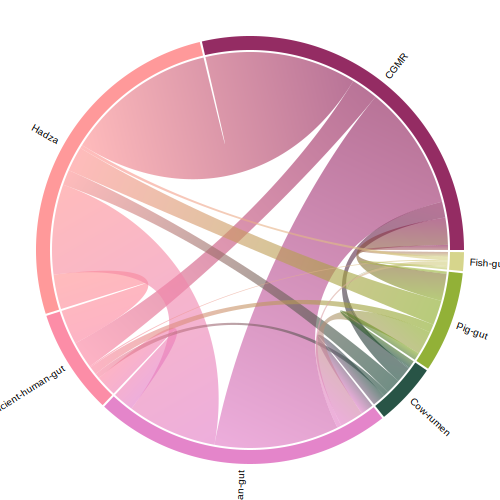

In [25]:
import openchord as ocd

fig = ocd.Chord(matrix, gut_order)
fig.show()

color_lst2 = [ label2color[x] for x in gut_order ]

fig.colormap = color_lst2
fig.save_svg('AMPs.svg')
fig.show()

In [26]:
def count_shared_amp(ord, gut_order=gut_order, gut_dict=gut_dict):
    num = 0
    lst = gut_dict[ord]
    other_lst = set()
    for x in gut_order:
        if x != ord:
            other_lst = other_lst.union(set(gut_dict[x]))
    for x in lst:
        if x in other_lst:
            num += 1
    return num
            

for i in range(len(gut_order)):
    print(gut_order[i])
    num = count_shared_amp(gut_order[i])
    x_total = len(gut_dict[gut_order[i]])
    print(num)
    print(round(100*num/x_total,2))

CGMR
107189
40.47
Hadza
92606
39.93
Ancient-human-gut
20178
44.83
MGnify-human-gut
75618
52.33
Cow-rumen
12345
15.82
Pig-gut
19081
47.04
Fish-gut
3409
30.11


In [ ]:
bpath = '/mnt/asustor/wenhui.li/02.AMP/data/AMP_with_MIC'

neg_df = pd.read_csv(os.path.join(bpath, 'neg.cdhit90.tab2'), sep='\t', header=None)
neg_df.columns = ['ID','Len']
neg_df['Flag'] = 'Neg'

pos1_df = pd.read_csv(os.path.join(bpath, 'pos.all.tab2'), sep='\t', header=None)
pos1_df.columns = ['ID','Len']
pos1_df['Flag'] = 'Pos'

pos2_df = pd.read_csv(os.path.join(bpath, 'pos_pro.all.tab2'), sep='\t', header=None)
pos2_df.columns = ['ID','Len']
pos2_df['Flag'] = 'Pos'

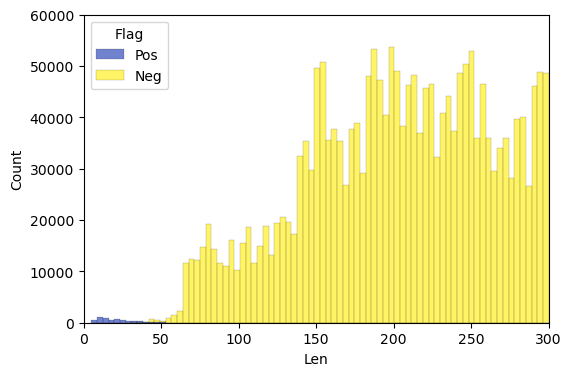

In [99]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def hex_to_rgb(value,opacity=0.2):
    value = value.lstrip('#')
    lv = len(value)
    (r,g,b) = tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
    code = 'rgba(%d,%d,%d,%.1f)' % (r,g,b,opacity)
    return code


palette = {'Neg':'#FFEB00', 'Pos':'#1230AE'}
tdata = pd.concat([pos1_df, neg_df], ignore_index=True)
fig = plt.figure(figsize=(6,4))
sns.histplot(data=tdata, x='Len',hue='Flag',
             hue_order=['Pos','Neg'] ,multiple='layer',
             bins=80,
            #  bw_adjust=.2,
             common_norm=True, fill=True,
             alpha=0.6, linewidth=0.1, palette=palette,)
plt.xlim(0,300)
plt.ylim(0,60000)
plt.savefig('Data_distribution.bg1.pdf',format='pdf')

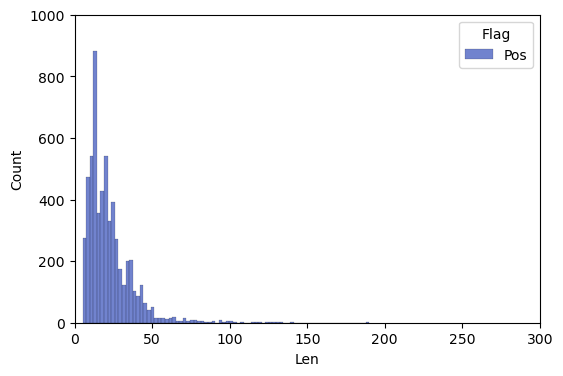

In [105]:
tdata = pd.concat([pos1_df, neg_df], ignore_index=True)
fig = plt.figure(figsize=(6,4))
sns.histplot(data=tdata[tdata.Flag=='Pos'], x='Len',hue='Flag',
            #  hue_order=['Pos','Neg'] ,multiple='layer',
             bins=80,
            #  bw_adjust=.2,
             common_norm=True, fill=True,
             alpha=0.6, linewidth=0.1, palette=palette,)
plt.xlim(0,300)
plt.ylim(0,1000)
plt.savefig('Data_distribution.fg1.pdf',format='pdf')

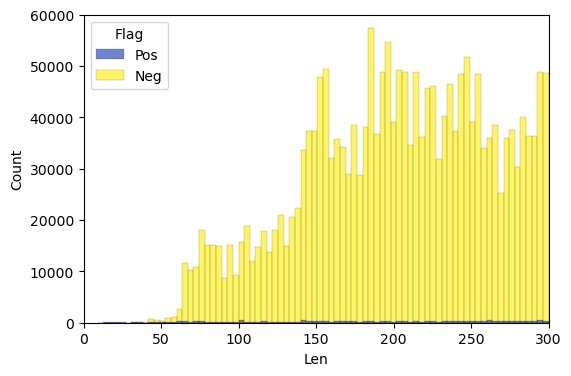

In [101]:
tdata = pd.concat([pos2_df, neg_df], ignore_index=True)

fig = plt.figure(figsize=(6,4))
sns.histplot(data=tdata, x='Len',hue='Flag',
             hue_order=['Pos','Neg'] ,multiple='layer',
             bins=80,
            #  bw_adjust=.2,
             common_norm=True, fill=True,
             alpha=0.6, linewidth=0.1, palette=palette,)
plt.xlim(0,300)
plt.ylim(0,60000)
plt.savefig('Data_distribution.bg2.pdf',format='pdf')

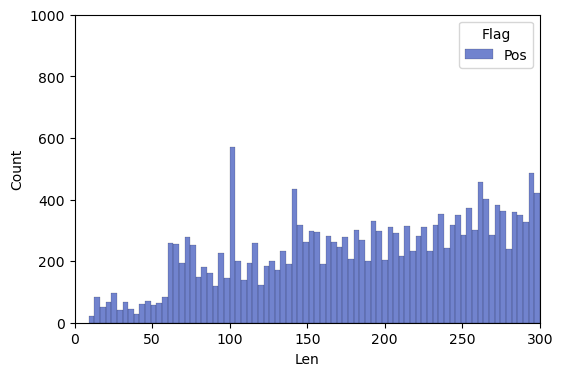

In [107]:
tdata = pd.concat([pos2_df, neg_df], ignore_index=True)
fig = plt.figure(figsize=(6,4))
sns.histplot(data=tdata[tdata.Flag=='Pos'], x='Len',hue='Flag',
            #  hue_order=['Pos','Neg'] ,multiple='layer',
             bins=80,
            #  bw_adjust=.2,
             common_norm=True, fill=True,
             alpha=0.6, linewidth=0.1, palette=palette,)
plt.xlim(0,300)
plt.ylim(0,1000)
plt.savefig('Data_distribution.fg2.pdf',format='pdf')

In [114]:
xdata = pd.read_csv('/mnt/asustor/wenhui.li/02.AMP/predict/outputs/Token_650M_epoch15/rmdup.animal.clst90_80.AMPclst95.eggnog.txt',sep='\t')
xdata = xdata[['AMP_clst','Pro_clst80','Pro_clst','Source','ProID','AMPID',
               'AMP','AMPlen','Position','Sequence','ID',]]

In [117]:
xdata.Source.drop_duplicates()

0               ancient_human_gut
52036              BGI_human_oral
139943                  data_CGMR
698532                 data_Hadza
1185203          MGnify_cow_rumen
1274618           MGnify_fish_gut
1280712          MGnify_human_gut
1457816         MGnify_human_oral
1472576            MGnify_pig_gut
1516944    MGnify_zibrafish_fecal
Name: Source, dtype: object

In [121]:
MGnify_df_lst = []

def get_7_layers_lineage(df):
    d, p, c, o, f, g, s = [], [], [], [], [], [], []
    for i in df.Lineage.tolist():
        if i == 'NoData':
            d.append('-')
            p.append('-')
            c.append('-')
            o.append('-')
            f.append('-')
            g.append('-')
            s.append('-')
        else:
            for x in i.split(';'):
                y = re.sub('.__','',x) if re.sub('.__','',x) != '' else '-'
                if x.startswith('d__'):
                    d.append(y)
                elif x.startswith('p__'):
                    p.append(y)
                elif x.startswith('c__'):
                    c.append(y)
                elif x.startswith('o__'):
                    o.append(y)
                elif x.startswith('f__'):
                    f.append(y)
                elif x.startswith('g__'):
                    g.append(y)
                elif x.startswith('s__'):
                    s.append(y)
    df['domain'] = d
    df['phyla'] = p
    df['class'] = c
    df['order'] = o
    df['family'] = f
    df['genera'] = g
    df['species'] = s
    return df

def combine_info(meta_file,input_df):
    
    meta = pd.read_csv(meta_file,sep='\t')
    taxon_dict = dict(zip(meta.Genome.tolist(), meta.Lineage.tolist()))
    
    target = input_df.copy(deep=True)
    target['Genome'] = [ x.split('@')[0] for x in target.ProID.tolist() ]
    target['Lineage'] = [ taxon_dict[x] if x in taxon_dict.keys() else 'NoData' for x in target['Genome'].tolist() ]    
    target = get_7_layers_lineage(target)
    
    return target

mgnify_dict = {
    'MGnify_cow_rumen':'Candidates_rmdup/ALL_pep/MGnify_cow_rumen/genomes-all_metadata.1.0.1.tsv',
    'MGnify_fish_gut':'Candidates_rmdup/ALL_pep/MGnify_fish_gut/genomes-all_metadata.2.0.tsv',
    'MGnify_human_gut':'Candidates_rmdup/ALL_pep/MGnify_human_gut/genomes-all_metadata.tsv',
    'MGnify_human_oral':'Candidates_rmdup/ALL_pep/MGnify_human_oral/genomes-all_metadata.1.0.1.tsv',
    'MGnify_marine':'Candidates_rmdup/ALL_pep/MGnify_marine/genomes-all_metadata.2.0.tsv',
    'MGnify_pig_gut':'Candidates_rmdup/ALL_pep/MGnify_pig_gut/genomes-all_metadata.tsv',
    'MGnify_zibrafish_fecal':'Candidates_rmdup/ALL_pep/MGnify_zibrafish_fecal/genomes-all_metadata.tsv',
}

for name, meta in mgnify_dict.items():
    target = combine_info(meta,xdata[xdata.Source==name])
    if target.shape[0] > 0:
        MGnify_df_lst.append(target)
    

In [194]:
Ancient_df_lst = []

def get_7_layers_lineage_ancient_human_gut(df):
    d, p, c, o, f, g, s = [], [], [], [], [], [], []
    for i in df.Lineage.tolist():
        if ('Unclassified' in i) or (i == 'NoData'):
            d.append('-')
            p.append('-')
            c.append('-')
            o.append('-')
            f.append('-')
            g.append('-')
            s.append('-')
        else:
            for x in i.split(';'):
                y = re.sub('.__','',x) if re.sub('.__','',x) != '' else '-'
                if x.startswith('d__'):
                    d.append(y)
                elif x.startswith('p__'):
                    p.append(y)
                elif x.startswith('c__'):
                    c.append(y)
                elif x.startswith('o__'):
                    o.append(y)
                elif x.startswith('f__'):
                    f.append(y)
                elif x.startswith('g__'):
                    g.append(y)
                elif x.startswith('s__'):
                    s.append(y)
    df['domain'] = d
    df['phyla'] = p
    df['class'] = c
    df['order'] = o
    df['family'] = f
    df['genera'] = g
    df['species'] = s
    return df

def combine_info_ancient_human_gut(meta_file,input_df):
    
    meta = pd.read_csv(meta_file,sep='\t')
    taxon_dict = dict(zip(meta.contigid.tolist(), meta.classification.tolist()))
    
    target = input_df.copy(deep=True)
    target['Genome'] = [ re.sub('_\d+$','',x.split('.')[-1]) for x in target.ProID.tolist() ]
    target['Lineage'] = [ taxon_dict[x] if x in taxon_dict.keys() else 'NoData' for x in target['Genome'].tolist() ]    
    target = get_7_layers_lineage_ancient_human_gut(target)
    
    return target

ancient_dict = {
    'AZ107': 'Candidates_rmdup/ALL_pep/ancient_human_gut/AZ107.taxon_classsification.txt',
    'AZ108': 'Candidates_rmdup/ALL_pep/ancient_human_gut/AZ108.taxon_classsification.txt',
    'AZ110A': 'Candidates_rmdup/ALL_pep/ancient_human_gut/AZ110A.taxon_classsification.txt',
    'UT30': 'Candidates_rmdup/ALL_pep/ancient_human_gut/UT30.3.taxon_classsification.txt',
    'UT43': 'Candidates_rmdup/ALL_pep/ancient_human_gut/UT43.2.taxon_classsification.txt',
    'Zape1': 'Candidates_rmdup/ALL_pep/ancient_human_gut/Zape1.taxon_classsification.txt',
    'Zape2': 'Candidates_rmdup/ALL_pep/ancient_human_gut/Zape2.taxon_classsification.txt',
    'Zape3': 'Candidates_rmdup/ALL_pep/ancient_human_gut/Zape3.taxon_classsification.txt',
}

adata = xdata[xdata.Source=='ancient_human_gut'].copy(deep=True)
adata['Sample'] = [ x.split('_')[0].split('.')[0] for x in adata.ProID.tolist() ]
for k, df in adata.groupby(by='Sample'):
    target = combine_info_ancient_human_gut(ancient_dict[k],df)
    if target.shape[0] > 0:
        Ancient_df_lst.append(target)
        

In [125]:
def get_7_layers_CGMR(df):
    d, p, c, o, f, g, s = [], [], [], [], [], [], []
    for i in df.Lineage.tolist():
        if ('Unclassified' in i) or (i == 'NoData'):
            d.append('-')
            p.append('-')
            c.append('-')
            o.append('-')
            f.append('-')
            g.append('-')
            s.append('-')
        else:
            for x in i.split(';'):
                y = re.sub('.__','',x) if re.sub('.__','',x) != '' else '-'
                if x.startswith('d__'):
                    d.append(y)
                elif x.startswith('p__'):
                    p.append(y)
                elif x.startswith('c__'):
                    c.append(y)
                elif x.startswith('o__'):
                    o.append(y)
                elif x.startswith('f__'):
                    f.append(y)
                elif x.startswith('g__'):
                    g.append(y)
                elif x.startswith('s__'):
                    s.append(y)
    df['domain'] = d
    df['phyla'] = p
    df['class'] = c
    df['order'] = o
    df['family'] = f
    df['genera'] = g
    df['species'] = s
    return df

def get_clust(proid):
    geno_id = '-'
    if proid.startswith('Cluster'):
        geno_id = proid.split('_')[0]
    elif proid.startswith('cluster_'):
        geno_id = re.findall(r'cluster_(\d+_\d+)_contig',proid)[0]
    return geno_id
        

def combine_info_CGMR(meta_file,input_df):
    
    meta = pd.read_csv(meta_file,sep='\t')
    taxon_dict = dict(zip(meta.cluster.tolist(), meta.classification.tolist()))
    
    target = input_df.copy(deep=True)
    target['Genome'] = [ get_clust(x) for x in target.ProID.tolist() ]
    target['Lineage'] = [ taxon_dict[x] if x in taxon_dict.keys() else 'NoData' for x in target['Genome'].tolist() ]    
    target = get_7_layers_CGMR(target)
    
    return target

CGMR_meta = 'Candidates_rmdup/ALL_pep/data_CGMR/CGMR_data.cluster.meta.txt'

CGMR_df = combine_info_CGMR(CGMR_meta, xdata[xdata.Source=='data_CGMR'])

In [127]:
def get_7_layers_Hadza(df):
    info = dict(zip(list(range(7)), [[], [], [], [], [], [], []]))
    for i in df.Lineage.tolist():
        if ('Unclassified' in i) or (i == 'NoData'):
            for k in list(range(7)):
                info[k].append('-')
        else:
            i = i.split()[0]
            xs = i.split(';')
            for k in range(7):
                x = xs[k]
                if x == 'unk':
                    y = '-'
                else:
                    y = re.sub('.__','',x) if re.sub('.__','',x) != '' else '-'
                info[k].append(y)
                
    df['domain'] = info[0]
    df['phyla'] = info[1]
    df['class'] = info[2]
    df['order'] = info[3]
    df['family'] = info[4]
    df['genera'] = info[5]
    df['species'] = info[6]
    return df

def combine_info_Hadza(meta_file,genome_file,input_df): 
    
    genome = pd.read_csv(genome_file, sep='\t', header=None)
    genome.columns = ['Genome','ORF']
    genome_dict = dict(zip( genome['ORF'].tolist(),genome['Genome'].tolist()))
    
    meta = pd.read_csv(meta_file,sep='\t')
    meta['Genome'] = [ re.sub('.fa$','',x) for x in meta['Genome'].tolist() ]
    meta.fillna('NoData',inplace=True)
    taxon_dict = dict(zip(meta.Genome.tolist(), meta.classification.tolist()))
    
    target = input_df.copy(deep=True)
    target['Genome'] = [ genome_dict[x] if x in genome_dict.keys() else 'NoData' for x in target.ProID.tolist() ]
    target['Lineage'] = [ taxon_dict[x] if x in taxon_dict.keys() else 'NoData' for x in target['Genome'].tolist() ]    
    target = get_7_layers_Hadza(target)
    
    return target, taxon_dict, genome_dict

Hadza_meta = 'Candidates_rmdup/ALL_pep/data_Hadza/Hazda_BacteriaArchaea_ORFs.meta.txt'
Hadza_genome = 'Candidates_rmdup/ALL_pep/data_Hadza/Hazda_BacteriaArchaea_ORFs.meta.genome.tab'

Hadza_df = combine_info_Hadza(Hadza_meta,Hadza_genome,xdata[xdata.Source=='data_Hadza'])

/tmp/ipykernel_1865338/1283784207.py:33: DtypeWarning: Columns (10,24,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(meta_file,sep='\t')
/tmp/ipykernel_1865338/1283784207.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoData' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  meta.fillna('NoData',inplace=True)


In [196]:
ydata = pd.concat(MGnify_df_lst+Ancient_df_lst+[CGMR_df, Hadza_df[0]], ignore_index=True)
ydata.to_csv('rmdup.animal.clst90_80.AMPclst95.eggnog.meta.txt',sep='\t',index=False)

In [220]:
set_lst = ['CGMR', 'Hadza', 'Ancient_human_gut', 'MGnify_human_gut',
           'Cow_rumen', 'Pig_gut', 'Fish_gut']

set_dict = {
    'data_CGMR': 'CGMR',
    'data_Hadza': 'Hadza',
    'ancient_human_gut': 'Ancient_human_gut',
    'MGnify_human_gut': 'MGnify_human_gut',
    'MGnify_cow_rumen': 'Cow_rumen',
    'MGnify_pig_gut': 'Pig_gut',
    'MGnify_fish_gut': 'Fish_gut',
    'MGnify_zibrafish_fecal': 'Fish_gut',
}

def count_linages(in_dict,set_lst=set_lst,set_dict=set_dict ):
    counts = {}
    type_counts = {}
    
    for n in set_dict.keys():
        if n in in_dict.keys():
            for k, c in in_dict.items():
                if k in set_dict.keys():
                    kn = set_dict[k]
                    for x, v in in_dict[k].items():
                        x = x.split('_')[0]
                        if x == 'Bacillota':
                            x = 'Firmicutes'
                        if not kn in counts.keys():
                            counts[kn] = {}
                        if not x in counts[kn].keys():
                            counts[kn][x] = v
                        else:
                            counts[kn][x] += v
                        if not x in type_counts.keys():
                            type_counts[x] = 0
                        else:
                            type_counts[x] += v
                            
    type_lst = []
    for (x,_) in reversed(sorted(type_counts.items(), key=lambda x:x[1])):
        if x != '-':
            type_lst.append(x)
       
    data = dict(zip(set_lst, [[],[],[],[],[],[],[]]))
    for x in type_lst+['-',]:
        for y in counts.keys():
            if x in counts[y]:
                data[y].append(counts[y][x])
            else:
                data[y].append(0)           
    data_df = pd.DataFrame.from_dict(data)
    data_df['Names'] = type_lst+['-',]
    return data_df
    # return counts, type_counts, type_lst
                    

In [221]:
## Domain
domain = {}
for x, df in ydata.groupby(by='Source'):
    domain[x] = df['domain'].value_counts().to_dict()

domain_df = count_linages(domain)
domain_df.to_csv('rmdup.animal.clst90_80.AMPclst95.eggnog.Domain.tab',sep='\t',index=False)

In [222]:
## Phyla
phyla = {}
for x, df in ydata.groupby(by='Source'):
    phyla[x] = df['phyla'].value_counts().to_dict()

phyla_df = count_linages(phyla)
phyla_df.to_csv('rmdup.animal.clst90_80.AMPclst95.eggnog.Phyla.tab',sep='\t',index=False)

In [223]:
## class
Class = {}
for x, df in ydata.groupby(by='Source'):
    Class[x] = df['class'].value_counts().to_dict()

Class_df = count_linages(Class)
Class_df.to_csv('rmdup.animal.clst90_80.AMPclst95.eggnog.Class.tab',sep='\t',index=False)

In [224]:
## order
order = {}
for x, df in ydata.groupby(by='Source'):
    order[x] = df['order'].value_counts().to_dict()

order_df = count_linages(order)
order_df.to_csv('rmdup.animal.clst90_80.AMPclst95.eggnog.Order.tab',sep='\t',index=False)

In [225]:
## family
family = {}
for x, df in ydata.groupby(by='Source'):
    family[x] = df['family'].value_counts().to_dict()

family_df = count_linages(family)
family_df.to_csv('rmdup.animal.clst90_80.AMPclst95.eggnog.Family.tab',sep='\t',index=False)

In [226]:
## genera
genera = {}
for x, df in ydata.groupby(by='Source'):
    genera[x] = df['genera'].value_counts().to_dict()

genera_df = count_linages(genera)
genera_df.to_csv('rmdup.animal.clst90_80.AMPclst95.eggnog.Genera.tab',sep='\t',index=False)

In [227]:
## species
species = {}
for x, df in ydata.groupby(by='Source'):
    species[x] = df['species'].value_counts().to_dict()

species_df = count_linages(species)
species_df.to_csv('rmdup.animal.clst90_80.AMPclst95.eggnog.Species.tab',sep='\t',index=False)

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pygal

In [28]:
xx = pd.read_csv('Phyla_3.csv')
for _, row in xx.iterrows():
    yy = row.tolist()
    print("dot_chart.add('%s', [%.4f,%.4f,%.4f,%.4f,%.4f,%.4f,%.4f])" % 
          (row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7]))

dot_chart.add('Firmicutes', [0.6919,0.7754,0.3624,0.6208,0.5538,0.6731,0.1818])
dot_chart.add('Bacteroidota', [0.1487,0.1024,0.0455,0.1307,0.2832,0.1713,0.1405])
dot_chart.add('Proteobacteria', [0.0763,0.0277,0.0000,0.1136,0.0281,0.0414,0.4953])
dot_chart.add('Actinobacteriota', [0.0418,0.0192,0.0000,0.0790,0.0187,0.0270,0.0756])
dot_chart.add('Verrucomicrobiota', [0.0102,0.0095,0.0094,0.0120,0.0297,0.0143,0.0073])
dot_chart.add('Other', [0.0277,0.0389,0.0761,0.0438,0.0865,0.0728,0.0995])
dot_chart.add('Unknown', [0.0035,0.0268,0.5066,0.0000,0.0000,0.0000,0.0000])
dot_chart.add('nan', [nan,nan,nan,nan,nan,nan,nan])
dot_chart.add('nan', [nan,nan,nan,nan,nan,nan,nan])
dot_chart.add('nan', [nan,nan,nan,nan,nan,nan,nan])


/tmp/ipykernel_3545486/3807543360.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7]))


In [29]:
pltset_lst = ['CGMR', 'Hadza', 'Ancient_human_gut', 'MGnify_human_gut',
           'Cow_rumen', 'Pig_gut', 'Fish_gut']
dot_chart = pygal.Dot(x_label_rotation=45)
# dot_chart.title = 'V8 benchmark results'
dot_chart.x_labels = pltset_lst
pltset_lst = ['CGMR', 'Hadza', 'Ancient_human_gut', 'MGnify_human_gut',
           'Cow_rumen', 'Pig_gut', 'Fish_gut']
dot_chart = pygal.Dot(x_label_rotation=45)
# dot_chart.title = 'V8 benchmark results'
dot_chart.x_labels = pltset_lst
dot_chart.add('Firmicutes', [0.6919,0.7754,0.3624,0.6208,0.5538,0.6731,0.1818])
dot_chart.add('Bacteroidota', [0.1487,0.1024,0.0455,0.1307,0.2832,0.1713,0.1405])
dot_chart.add('Proteobacteria', [0.0763,0.0277,0.0000,0.1136,0.0281,0.0414,0.4953])
dot_chart.add('Actinobacteriota', [0.0418,0.0192,0.0000,0.0790,0.0187,0.0270,0.0756])
dot_chart.add('Verrucomicrobiota', [0.0102,0.0095,0.0094,0.0120,0.0297,0.0143,0.0073])
dot_chart.add('Other', [0.0277,0.0389,0.0761,0.0438,0.0865,0.0728,0.0995])
dot_chart.add('Unknown', [0.0035,0.0268,0.5066,0.0000,0.0000,0.0000,0.0000])
dot_chart.add('Legend', [1.,0.8,0.6,0.4,0.2,0.1,0.01])
dot_chart.render_to_file('Phyla_3.svg') 